In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/Users/yenalee/Desktop/workplace/AI_2025-1/week5/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [4]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

<Axes: xlabel='Rings', ylabel='Count'>

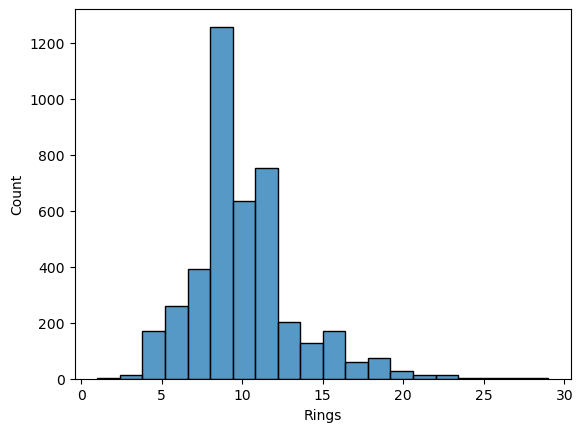

In [5]:
import seaborn as sns
sns.histplot(df['Rings'], bins=20)

In [6]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=False, dtype=int)

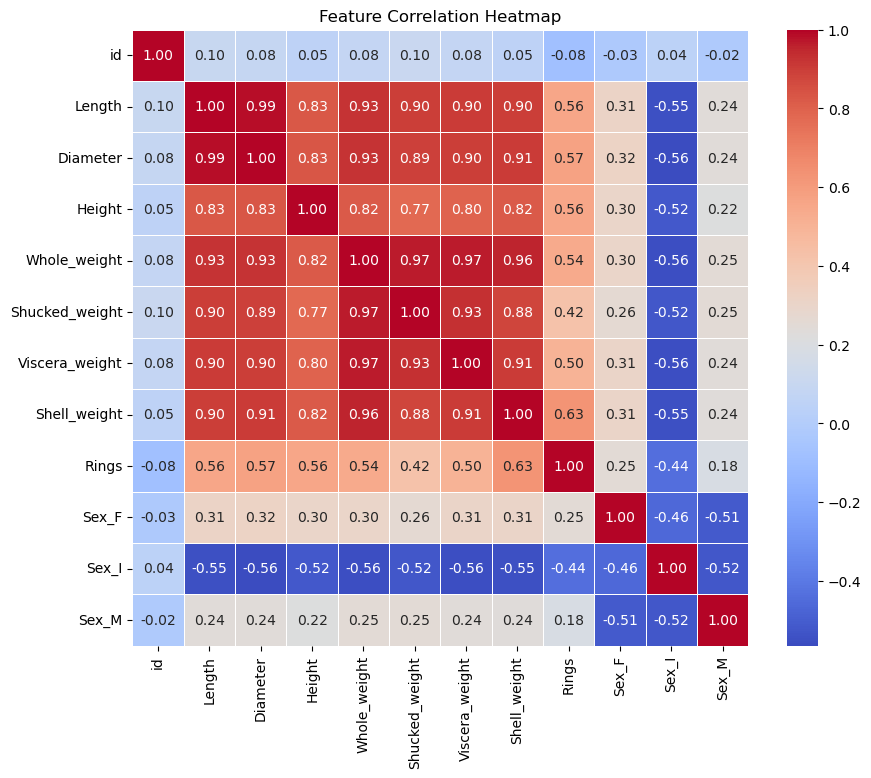

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 계산
corr = df.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [8]:
df = df.drop(['id', 'Sex_I'], axis=1)
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0


In [9]:
x = df.drop('Rings', axis=1).values
y = df['Rings'].values

In [10]:
y

array([15,  7,  9, ...,  9, 10, 12])

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = scaler.fit_transform(x)
y = scaler.fit_transform(y.reshape(-1,1))

In [12]:
x

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.63821689,
        -0.67483383,  1.31667716],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.21298732,
        -0.67483383,  1.31667716],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.20713907,
         1.48184628, -0.75948762],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.49695471,
        -0.67483383,  1.31667716],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.41073914,
         1.48184628, -0.75948762],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  1.84048058,
        -0.67483383,  1.31667716]])

In [13]:
y

array([[ 1.57154357],
       [-0.91001299],
       [-0.28962385],
       ...,
       [-0.28962385],
       [ 0.02057072],
       [ 0.64095986]])

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) 

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3341, 9), (836, 9), (3341, 1), (836, 1))

In [16]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(20,input_shape=(9,),activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss = 'mse', metrics = ['mse'])

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │           756 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         1,332 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │           555 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,859 (11.17 KB)

 Trainable params: 2,859 (11.17 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
N_EPOCHS = 30

history=model.fit(x=x_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_split=0.2)
y_pred = model.predict(x_test)

Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 0.7762 - mse: 0.7762 - val_loss: 0.5031 - val_mse: 0.5031
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.5495 - mse: 0.5495 - val_loss: 0.4256 - val_mse: 0.4256
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.4536 - mse: 0.4536 - val_loss: 0.4113 - val_mse: 0.4113
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.4693 - mse: 0.4693 - val_loss: 0.3991 - val_mse: 0.3991
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.4591 - mse: 0.4591 - val_loss: 0.3863 - val_mse: 0.3863
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.4614 - mse: 0.4614 - val_loss: 0.3906 - val_mse: 0.3906
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.4582 - mse: 0.4582 - val_loss: 0.3720 - val_mse: 0.3720
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.4065 - mse: 0.4065 - val_loss: 0.3901 - val_mse: 0.3901
Epoch 9/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - lo

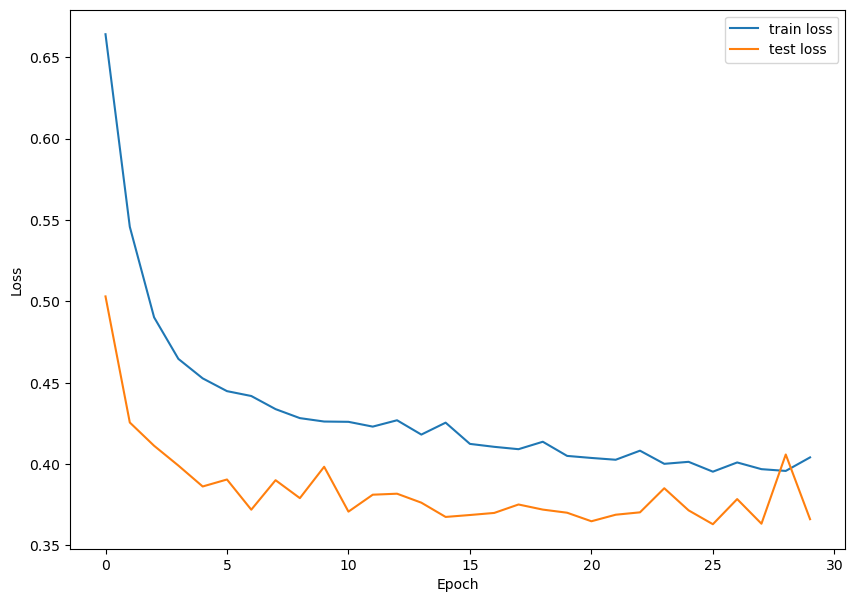

In [18]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
model.evaluate(x_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.4465 - mse: 0.4465


[0.4389308989048004, 0.4389308989048004]